**Apply PCA to the Diabetes dataset.  What are the resulting projections for the top 2 dimensions?**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

df = pd.read_csv('Datasets for Assignment 4/diabetes.csv')
X = df.drop(columns=['class'])
y = df['class']

# normalize data
data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 

# PCA
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(data_scaled)

# Dump components relations with features:
# print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

#The fit_transform returns a numpy array of each data point expressed in terms of the principle components
X_train_pc = pca.fit_transform(data_scaled)

# View the principle components
print("********************************")
print("Here are the top 2 components of the Diabetes data set after applying PCA")
dfComponents = pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])
dfComponents

********************************
Here are the top 2 components of the Diabetes data set after applying PCA


,preg,plas,pres,skin,insu,mass,pedi,age
PC-1,0.128432,0.393083,0.360003,0.439824,0.435026,0.451941,0.270611,0.198027
PC-2,0.593786,0.174029,0.183892,-0.331965,-0.250781,-0.100960,-0.122069,0.620589


In [25]:
i = 0
for c in pca.explained_variance_ratio_[:2]:
    i = i+1
    print("For component " + str(i) + " the percentage of the variance explained is: {:.2%}".format(c))

For component 1 the percentage of the variance explained is: 26.18%
For component 2 the percentage of the variance explained is: 21.64%


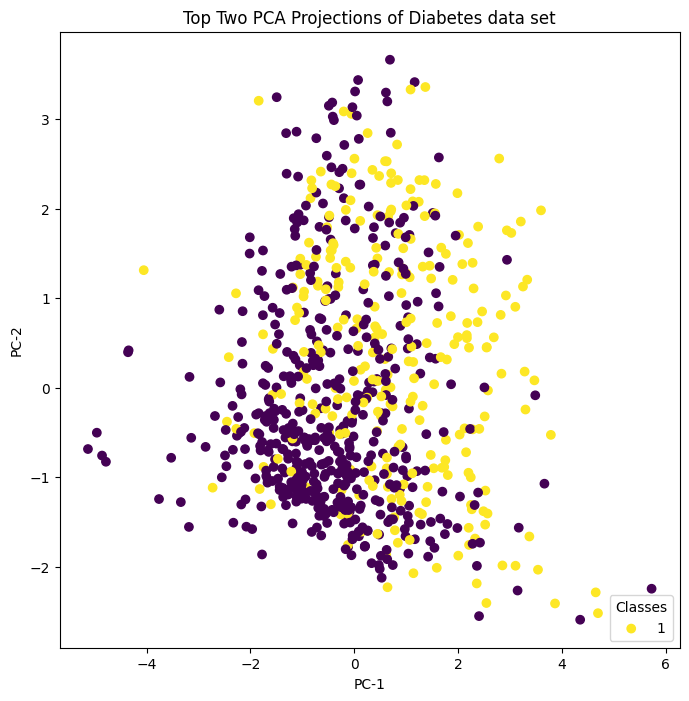

In [26]:
X_pcfig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=y) # Need to figure out how to color the original classes
plt.xlabel('PC-1')
plt.ylabel('PC-2')
ax.legend(y, loc="lower right", title="Classes")
ax.set_title("Top Two PCA Projections of Diabetes data set");

In [27]:
df_export = pd.DataFrame(X_train_pc, columns=['PC-1', 'PC-2'])
df_export.to_csv('diabetes_pca_top_2_projections.csv')




**Apply LDA and PCA to the iris dataset. Using the top 2 dimensions, graph the resulting subspace and include the graphs here.  Which one produces a better separation between classes.**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA

# load dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# print(f"Iris columns: {df.columns}")

# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

In [12]:
# PCA
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(data_scaled)

# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC-1           0.521066         -0.269347           0.580413          0.564857
PC-2           0.377418          0.923296           0.024492          0.066942


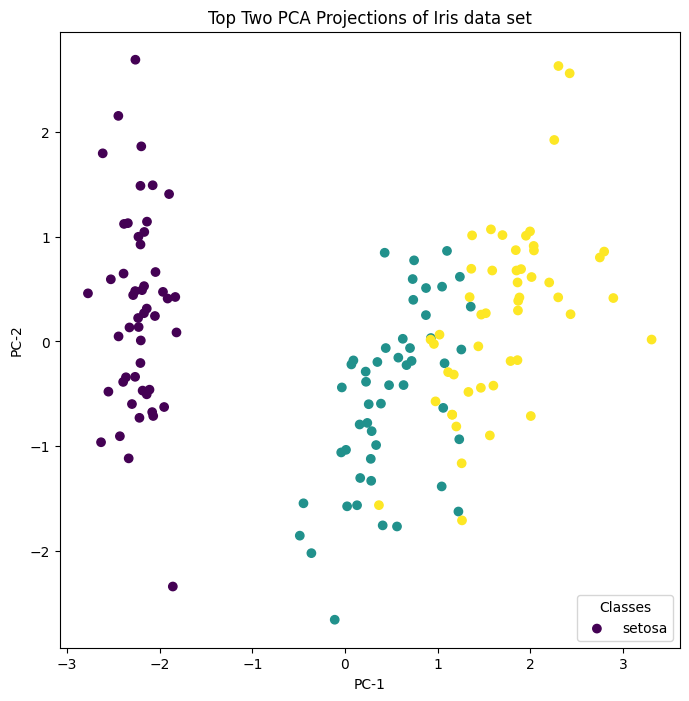

In [13]:
X_pcfig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=iris.target) # Need to figure out how to color the original classes
plt.xlabel('PC-1')
plt.ylabel('PC-2')
ax.set_title("Top Two PCA Projections of Iris data set");
ax.legend(iris.target_names, loc="lower right", title="Classes")

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
X_train_pc = clf.fit_transform(data_scaled, iris.target)

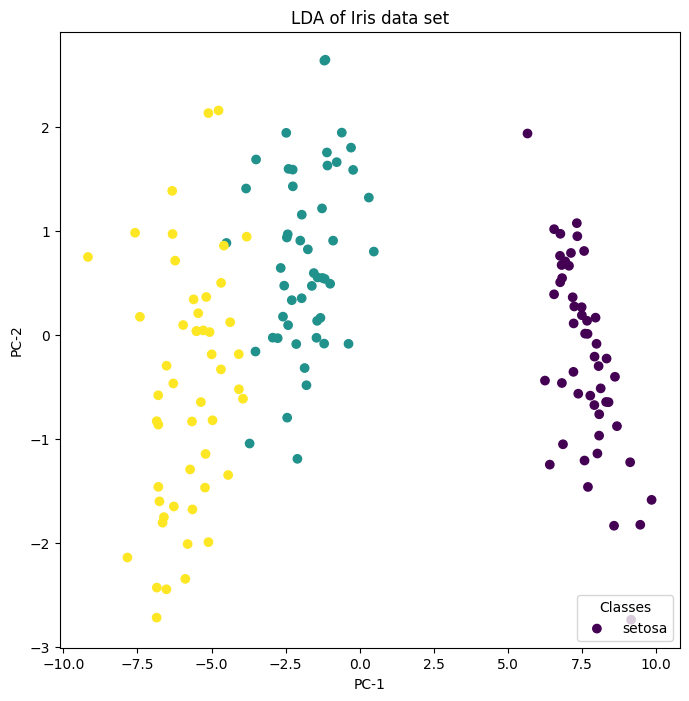

In [17]:
X_pcfig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=iris.target) # Need to figure out how to color the original classes
plt.xlabel('PC-1')
plt.ylabel('PC-2')
ax.set_title("LDA of Iris data set");
ax.legend(iris.target_names, loc="lower right", title="Classes")